In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/forest tree/StudentMarksDataset.csv")

In [5]:
from sklearn.preprocessing import LabelEncoder

def Grade_class(marks):
    if marks >= 90:
        return 'A'
    elif marks >= 80:
        return 'B'
    elif marks >= 70:
        return 'C'
    elif marks >= 60:
        return 'D'
    elif marks >= 50:
        return 'E'
    else:
        return 'F'

df["Grade"] = df["Std_Marks"].apply(Grade_class)
le = LabelEncoder()

In [6]:
df["Std_Branch"] = le.fit_transform(df["Std_Branch"])
df["Std_Course"] = le.fit_transform(df["Std_Course"])
df["Std_Name"] = le.fit_transform(df["Std_Name"])
df["Std_RollNo"] = le.fit_transform(df["Std_RollNo"])
df["Grade"] = le.fit_transform(df["Grade"])


In [7]:
X = df[["Std_Branch", "Std_Course", "Std_Marks"]]
y = df["Grade"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42
)


In [9]:
rf = RandomForestClassifier(
n_estimators=100,
criterion="entropy",
random_state=42
)

In [10]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [11]:
y_pred = rf.predict(X_test)

In [12]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.98


In [13]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.97      1.00      0.98        30
           2       0.00      0.00      0.00         1

    accuracy                           0.98        50
   macro avg       0.66      0.67      0.66        50
weighted avg       0.96      0.98      0.97        50



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
importances = rf.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.3f}")

Std_Branch: 0.088
Std_Course: 0.053
Std_Marks: 0.859


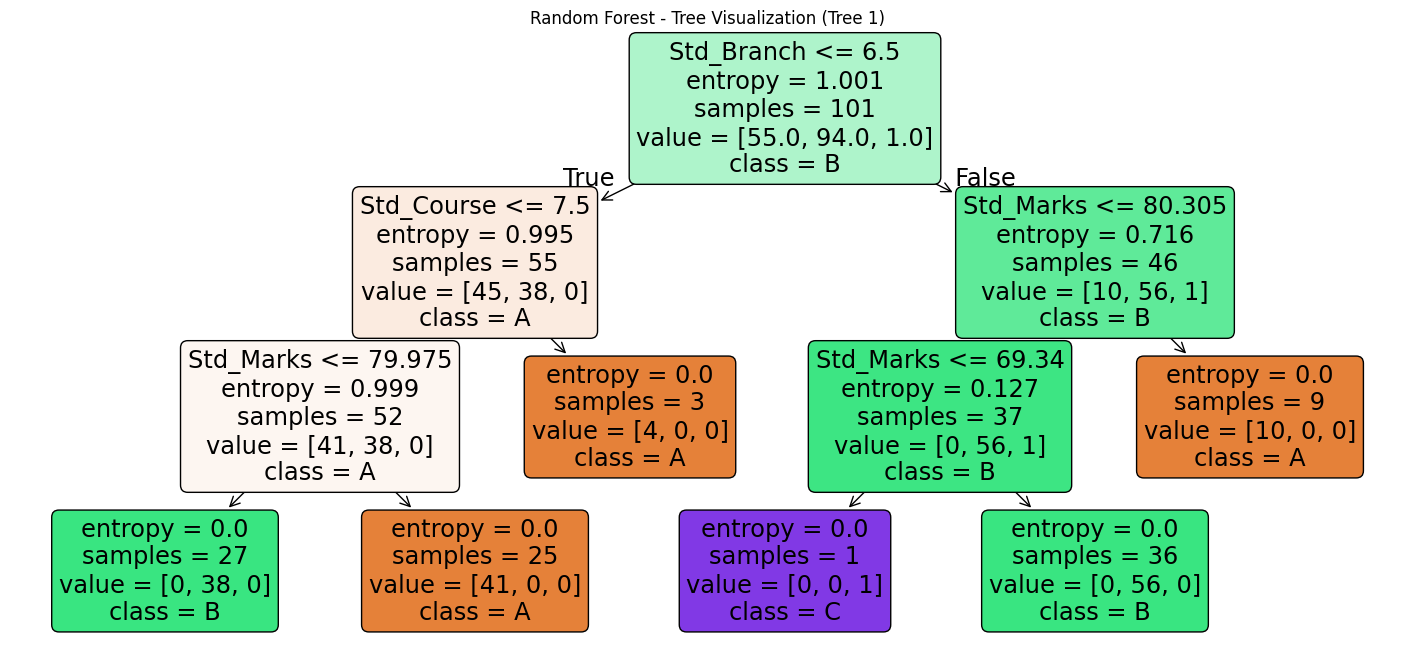

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18, 8))
plot_tree(
rf.estimators_[0], # first tree in the forest
feature_names=X.columns,
class_names=["A", "B", "C"],
filled=True,
rounded=True
)
plt.title("Random Forest - Tree Visualization (Tree 1)")
plt.show()

In [20]:
from google.colab import files
import pickle

# Save the trained model
with open('random.pkl', 'wb') as f:
  pickle.dump(df, f)

# Download the saved model
files.download("random.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>